In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from google.colab import auth
import gspread
from google.auth import default

In [ ]:
auth.authenticate_user()
creds,_=default()
gc=gspread.authorize(creds)
worksheet=gc.open("EX1-dl").sheet1
df=worksheet.get_all_values()
print(df)

[['input', 'output'], ['1', '9'], ['2', '14'], ['3', '19'], ['4', '24'], ['5', '29'], ['6', '34'], ['7', '39'], ['8', '44'], ['9', '49'], ['10', '54'], ['11', '59'], ['12', '64'], ['13', '69'], ['14', '74'], ['15', '79'], ['16', '84'], ['17', '89'], ['18', '94'], ['19', '99'], ['20', '104']]


In [ ]:
ds1=pd.DataFrame(df[1:],columns=df[0])
ds1

,input,output
0,1,9
1,2,14
2,3,19
3,4,24
4,5,29
5,6,34
6,7,39
7,8,44
8,9,49
9,10,54


In [ ]:
ds1=ds1.astype({'input':'float'})
ds1=ds1.astype({'output':'float'})
ds1.head()


,input,output
0,1.0,9.0
1,2.0,14.0
2,3.0,19.0
3,4.0,24.0
4,5.0,29.0


In [ ]:
x = ds1[['input']].values
y = ds1[['output']].values
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.33,random_state=33)


In [ ]:
scaler=MinMaxScaler()
scaler.fit(x_train)

MinMaxScaler()

In [ ]:
xtrain=scaler.transform(x_train)
model=Sequential([Dense(8,activation="relu",input_shape=[1]),Dense(10,activation="relu"),Dense(1)])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='rmsprop',loss='mse')

In [ ]:
model.fit(xtrain,y_train,epochs=2000)

Epoch 1/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 680ms/step - loss: 3619.6216
Epoch 2/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 3617.8501
Epoch 3/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 3616.5620
Epoch 4/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 3615.4753
Epoch 5/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 3614.5068
Epoch 6/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 3613.6172
Epoch 7/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 3612.7817
Epoch 8/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 3611.9861
Epoch 9/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 3611.2239
Epoch 10/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 3610.4907
Epoch 11/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 3609.7671
Epoch 12/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 3609.0505
Epoch 13/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 3608.3381
Epoch 14/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 3607.6038
Epoch 15/2000
1/1 ━━━━━━━━━━

<Axes: >

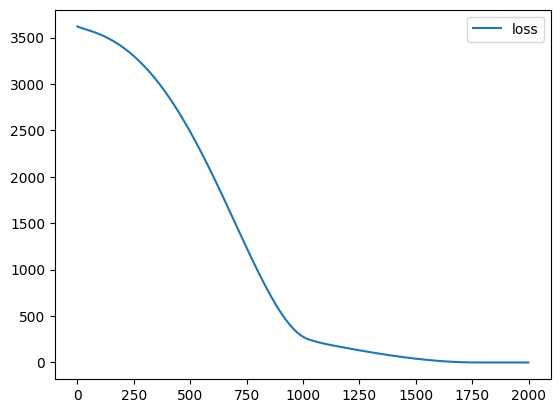

In [49]:
cf=pd.DataFrame(model.history.history)
cf.plot()


In [50]:
xtrain=scaler.transform(x_test)
model.evaluate(xtrain,y_test)
n=[[17]]
n=scaler.transform(n)
model.predict(n)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - loss: 0.0069
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


array([[88.89722]], dtype=float32)